# Descripción de datos por medio de gráficas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gráficas para datos categoricos

**Ejemplo 1.3**

<p style='text-align:justify;'>
En una encuesta respecto a la educación pública, a 400 administradores de escuelas se les pidió calificaran la calidad de la educación en Estados Unidos. Sus respuestas están resumidas en la tabla 1.1. Construya una gráfica de pastel y una de barras a partir de este conjunto de datos.
</p>

In [109]:
df = pd.DataFrame(
    np.array([
        ['A', 35], 
        ['B', 260], 
        ['C', 93], 
        ['D', 12]]
    ), 
    columns=['Calificación', 'Frecuencia']
)

df =df.set_index('Calificación')

In [123]:
df = df.reset_index()

In [116]:
df['Frecuencia'] = pd.to_numeric(df['Frecuencia'])

In [133]:
df['Porcentaje'] = (df['Frecuencia'] / df['Frecuencia'].sum()) * 100

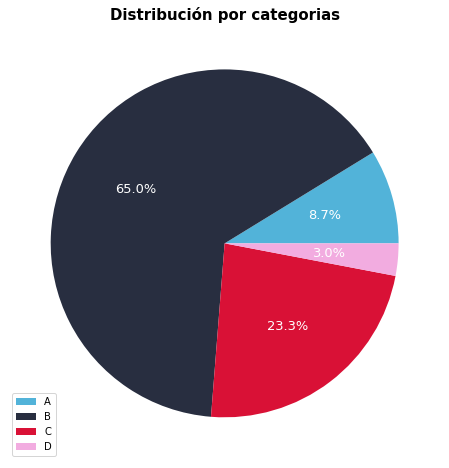

In [69]:
colores = ['#52B3D9', '#282E40', '#D91136', '#F2ACE0']

plt.figure(figsize=(8,8))

plt.pie(df['Frecuencia'], 
        autopct='%1.1f%%', 
        colors=colores, 
        textprops={
            'color':'white', 
            'fontsize': 13
        })

plt.title(
    'Distribución por categorias', 
    fontdict={
        'color':'black',
        'fontweight': 'bold',
        'size': 15
    })

plt.legend(df.index, loc='lower left')

plt.show()

In [126]:
df

,Calificación,Frecuencia
0,A,35
1,B,260
2,C,93
3,D,12


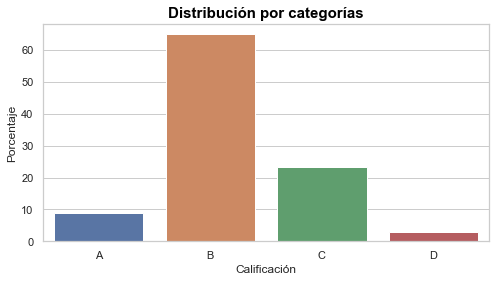

In [146]:
plt.figure(figsize=(8,4))
sns.barplot(x=df['Calificación'], y=df['Porcentaje'])
plt.title(
    'Distribución por categorías',
    fontdict={
        'color':'black',
        'fontsize': 15,
        'fontweight': 'bold'
    }
)
plt.show()

**Ejemplo 1.4**

<p style='text-align: justify;'>
Una bolsa de tamaño botana de dulces de cacahuate M&M’S contiene 21 dulces con los colores que se indican en la tabla 1.3. La variable “color” es cualitativa, por lo que la tabla 1.4 pone en lista las seis categorías junto con un total del número de dulces de cada color. Las últimas tres columnas de la tabla 1.4 dan las tres diferentes medidas de con qué frecuencia se presenta cada categoría. Como las categorías son colores y no tienen un orden particular, se pueden construir gráficas de barras con muchas formas diferentes con sólo reordenar las barras. Para enfatizar que el café es el color más frecuente, seguido por el azul, verde y anaranjado, ordenamos las barras de mayor a menor y generamos la gráfica de barras usando el MINITAB en la figura 1.5. Una gráfica de barras en la que las barras están ordenadas de mayor a menor se denomina gráfica de Pareto
</p>

In [289]:
lista = ['Café', 'Rojo', 'Amarillo', 'Café', 'Anaranjado', 'Amarillo', 'Verde', 'Rojo', 'Anaranjado', 'Azul', 'Azul', 'Café', 
         'Verde', 'Verde', 'Azul', 'Café', 'Azul', 'Café', 'Azul', 'Café', 'Anaranjado' ]


In [290]:
df = pd.DataFrame(lista, columns=['Colors'])
df['Frecuencia'] = 1

In [291]:
df = df.groupby('Colors').sum()

In [292]:
df['Frecuencia Relativa'] = (df['Frecuencia'] / df['Frecuencia'].sum())
df['Porcentaje'] = (df['Frecuencia Relativa'] * 100)

In [293]:
df = df.reset_index()
df.loc['Total'] = df.sum()
df.iloc[6,0] = ''

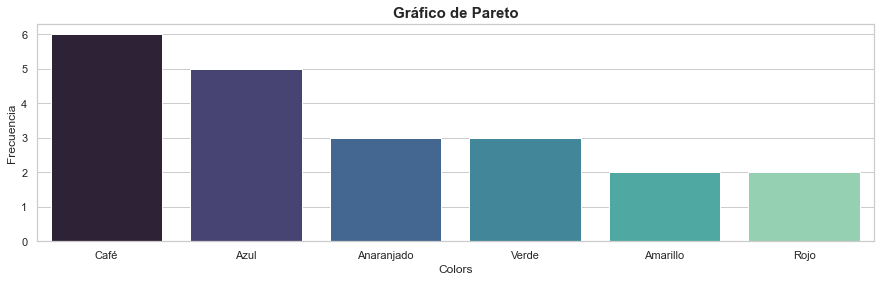

In [370]:
plt.figure(figsize=(15,4))
plt.title(
    'Gráfico de Pareto',
    fontdict={
        'fontweight':'bold',
        'fontsize': 15
    }
)
sns.barplot(
    data=df.iloc[:6].sort_values('Frecuencia', ascending=False), 
    x='Colors', 
    y='Frecuencia', 
    palette='mako',
#     color='b',
)
plt.show()